## Let's build a classifier to predict whether or not rides will be > 30 min.

In [12]:
from numpy import *
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.decomposition import PCA


import sys
sys.path.append("/Users/efandel/Desktop/iPython Tools")
from rtbpythonutils import *
%matplotlib inline

In [2]:
trip_data = pd.read_csv('/Users/efandel/Desktop/hubway_2011_07_through_2013_11/hubway_trips.csv')
station_data = pd.read_csv('/Users/efandel/Desktop/hubway_2011_07_through_2013_11/hubway_stations.csv')
trip_data['label'] = trip_data.duration
trip_data.loc[trip_data['duration']/60 < 30, 'label'] = 0
trip_data.loc[trip_data['duration']/60 >= 30, 'label'] = 1
trip_data.dropna(inplace=True)

In [3]:
trip_data.groupby(['label'])['seq_id'].count()

label
0    341899
1      8499
Name: seq_id, dtype: int64

### ^ Many more negatives than positives... let's balance the classes

In [4]:
negatives = trip_data[trip_data.label==0]
positives = trip_data[trip_data.label==1]

negative_fraction = 1

negatives = negatives.sample(round(len(positives)*negative_fraction))

trip_data_balanced = pd.concat([negatives,positives])

In [5]:
len(negatives)

8499

In [6]:
len(positives)

8499

In [7]:
def random_split(X,Y, frac=0.8):
    msk = np.random.rand(len(X)) < frac
    return X[msk], Y[msk], X[~msk], Y[~msk]

In [29]:
#columns = ['gender']
columns = ['gender','birth_date','strt_statn','end_statn']
X = pd.get_dummies(trip_data_balanced[columns],columns=columns)
Y = trip_data_balanced['label']

X_train, Y_train, X_test, Y_test = random_split(X, Y)

Logistic Regression
('Training Accuracy', 65.36)
('Test Accuracy', 64.39)
('Training Loss', 0.6222357628156574)
('Test Loss', 0.63576898361342427)
('Mean Loss', 0.69315699218723037)
 
Cross-Validation AUCs [ 0.61037699  0.63797128  0.66275502  0.70667318  0.5852565 ], Average AUC 0.640606594245
 
Confusion Matrix
[[1147  541]
 [ 654 1014]]


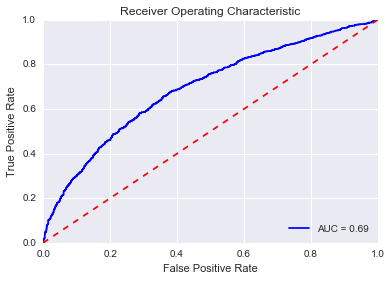

In [31]:
method = "Logistic Regression"

model = LogisticRegression()
model.fit(X_train, Y_train)

train_acc = round(model.score(X_train, Y_train) * 100, 2)
test_acc = round(model.score(X_test, Y_test) * 100, 2)

train_loss = sklearn.metrics.log_loss(Y_train, model.predict_proba(X_train)[:,1])
test_loss = sklearn.metrics.log_loss(Y_test, model.predict_proba(X_test)[:,1])

mean_loss = sklearn.metrics.log_loss(Y_test, ones(len(Y_test)) * mean(Y_train))

confusion_matrix = sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test))

print(method)
print("Training Accuracy", train_acc)
print("Test Accuracy", test_acc)
print("Training Loss", train_loss)
print("Test Loss", test_loss)
print("Mean Loss", mean_loss)
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=5)
print(" ")
print('Cross-Validation AUCs {}, Average AUC {}'.format(scores, scores.mean()))
print(" ")
print("Confusion Matrix")
print(confusion_matrix)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree
('Training Accuracy', 59.95)
('Test Accuracy', 57.99)
('Training Loss', 0.64772718989733202)
('Test Loss', 0.82497655457782815)
('Mean Loss', 0.69315699218723037)
 
Cross-Validation AUCs [ 0.60237734  0.59706055  0.60083322  0.60965467  0.59057261], Average AUC 0.600099678638
 
Confusion Matrix
[[1305  383]
 [1027  641]]


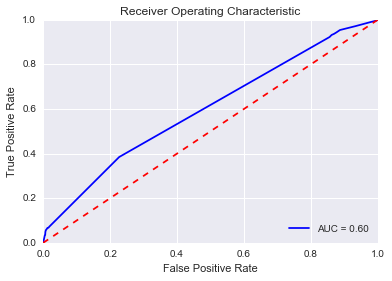

In [32]:
method = "Decision Tree"

model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, Y_train)

train_acc = round(model.score(X_train, Y_train) * 100, 2)
test_acc = round(model.score(X_test, Y_test) * 100, 2)

train_loss = sklearn.metrics.log_loss(Y_train, model.predict_proba(X_train)[:,1])
test_loss = sklearn.metrics.log_loss(Y_test, model.predict_proba(X_test)[:,1])

mean_loss = sklearn.metrics.log_loss(Y_test, ones(len(Y_test)) * mean(Y_train))

confusion_matrix = sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test))


print(method)
print("Training Accuracy", train_acc)
print("Test Accuracy", test_acc)
print("Training Loss", train_loss)
print("Test Loss", test_loss)
print("Mean Loss", mean_loss)
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=5)
print(" ")
print('Cross-Validation AUCs {}, Average AUC {}'.format(scores, scores.mean()))
print(" ")
print("Confusion Matrix")
print(confusion_matrix)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest
('Training Accuracy', 95.53)
('Test Accuracy', 68.0)
('Training Loss', 0.18878984362013926)
('Test Loss', 1.3228203723463781)
('Mean Loss', 0.69315699218723037)
 
Cross-Validation AUCs [ 0.68446298  0.71094758  0.72347578  0.73115969  0.68545965], Average AUC 0.70710113338
 
Confusion Matrix
[[1248  440]
 [ 634 1034]]


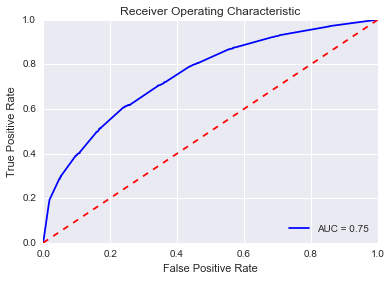

In [33]:
method="Random Forest"

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

train_acc = round(model.score(X_train, Y_train) * 100, 2)
test_acc = round(model.score(X_test, Y_test) * 100, 2)

train_loss = sklearn.metrics.log_loss(Y_train, model.predict_proba(X_train)[:,1])
test_loss = sklearn.metrics.log_loss(Y_test, model.predict_proba(X_test)[:,1])

mean_loss = sklearn.metrics.log_loss(Y_test, ones(len(Y_test)) * mean(Y_train))

confusion_matrix = sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test))

print(method)
print("Training Accuracy", train_acc)
print("Test Accuracy", test_acc)
print("Training Loss", train_loss)
print("Test Loss", test_loss)
print("Mean Loss", mean_loss)
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=5)
print(" ")
print('Cross-Validation AUCs {}, Average AUC {}'.format(scores, scores.mean()))
print(" ")
print("Confusion Matrix")
print(confusion_matrix)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Let's try using PCA to reduce the number of variables

In [34]:
X_train.head()

,gender_Female,gender_Male,birth_date_1932.0,birth_date_1934.0,birth_date_1938.0,birth_date_1939.0,birth_date_1940.0,birth_date_1941.0,birth_date_1942.0,birth_date_1943.0,...,end_statn_89.0,end_statn_90.0,end_statn_91.0,end_statn_92.0,end_statn_93.0,end_statn_94.0,end_statn_95.0,end_statn_96.0,end_statn_97.0,end_statn_98.0
203589,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363987,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285899,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292773,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364751,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ^ 252 features is a lot. Let's try aggregating that to 10 and see how the random forest compares in terms of AUC score

In [59]:
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X)
X_train, Y_train, X_test, Y_test = random_split(X_pca, Y)

Random Forest
('Training Accuracy', 95.69)
('Test Accuracy', 64.24)
('Training Loss', 0.1990099252371304)
('Test Loss', 1.205032593964529)
('Mean Loss', 0.6931971385944582)
 
Cross-Validation AUCs [ 0.68312958  0.70546471  0.7307846   0.74160709  0.69489947], Average AUC 0.711177090885
 
Confusion Matrix
[[1165  520]
 [ 669  971]]


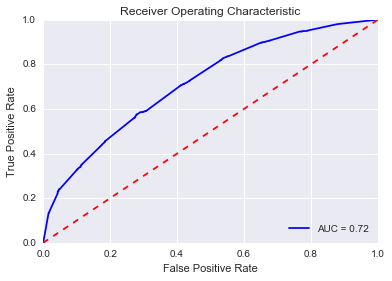

In [60]:
method="Random Forest"

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

train_acc = round(model.score(X_train, Y_train) * 100, 2)
test_acc = round(model.score(X_test, Y_test) * 100, 2)

train_loss = sklearn.metrics.log_loss(Y_train, model.predict_proba(X_train)[:,1])
test_loss = sklearn.metrics.log_loss(Y_test, model.predict_proba(X_test)[:,1])

mean_loss = sklearn.metrics.log_loss(Y_test, ones(len(Y_test)) * mean(Y_train))

confusion_matrix = sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test))

print(method)
print("Training Accuracy", train_acc)
print("Test Accuracy", test_acc)
print("Training Loss", train_loss)
print("Test Loss", test_loss)
print("Mean Loss", mean_loss)
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=5)
print(" ")
print('Cross-Validation AUCs {}, Average AUC {}'.format(scores, scores.mean()))
print(" ")
print("Confusion Matrix")
print(confusion_matrix)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Going from 252 to 10 features reduced AUC by 3 percentage points.

### % Variance explained by each principal component:

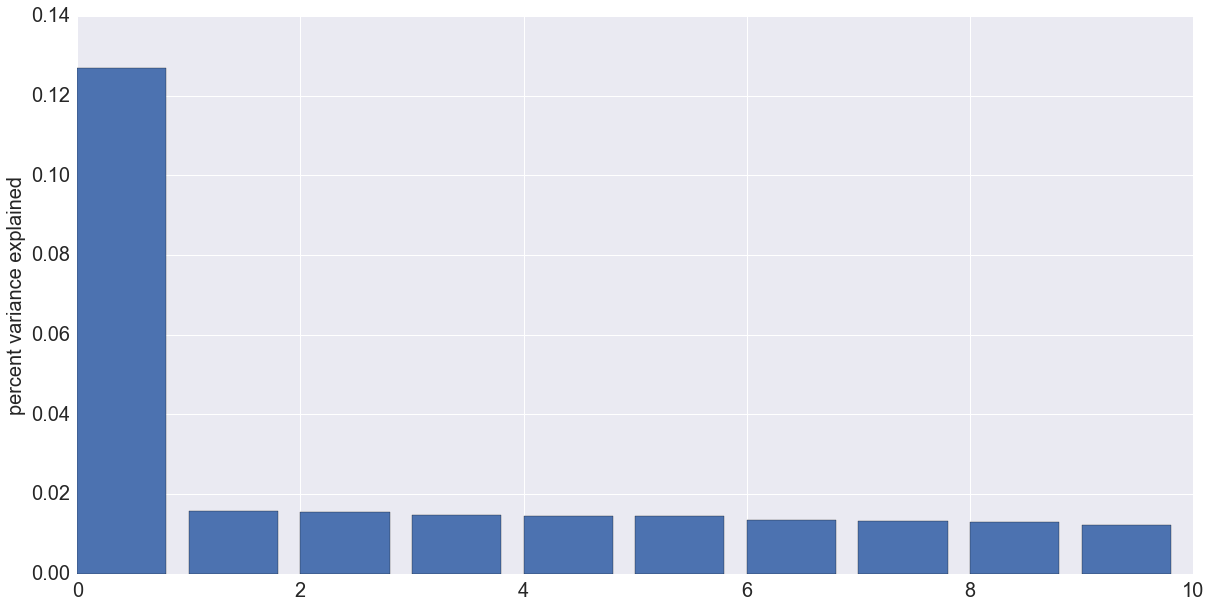

In [76]:
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.bar([x for x in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)
ax.set_ylabel('percent variance explained',size=20)


In [55]:
pca.explained_variance_ratio_

array([ 0.12689375,  0.01573876,  0.0154049 ,  0.01467063,  0.01452644,
        0.01442003,  0.01357972,  0.01329188,  0.01287691,  0.0121649 ])